In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # for muting warning messages
# mute warning messages
warnings.filterwarnings('ignore')
# Load the dataset

data_path = "../data/raw/credit_risk_dataset.csv"
df = pd.read_csv(data_path)

# Exploratory Data Analysis (EDA)
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%        10.990000      0.000000             0.150000   
75%        13.470000      0.000000             0.230000   
max        23.220000      1.000000             0.830000   

       cb_person_cred_hist_length  
count                32581.000000  
mean                     5.804211  
std                      4.055001  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000

### Distribution of Numerical Features

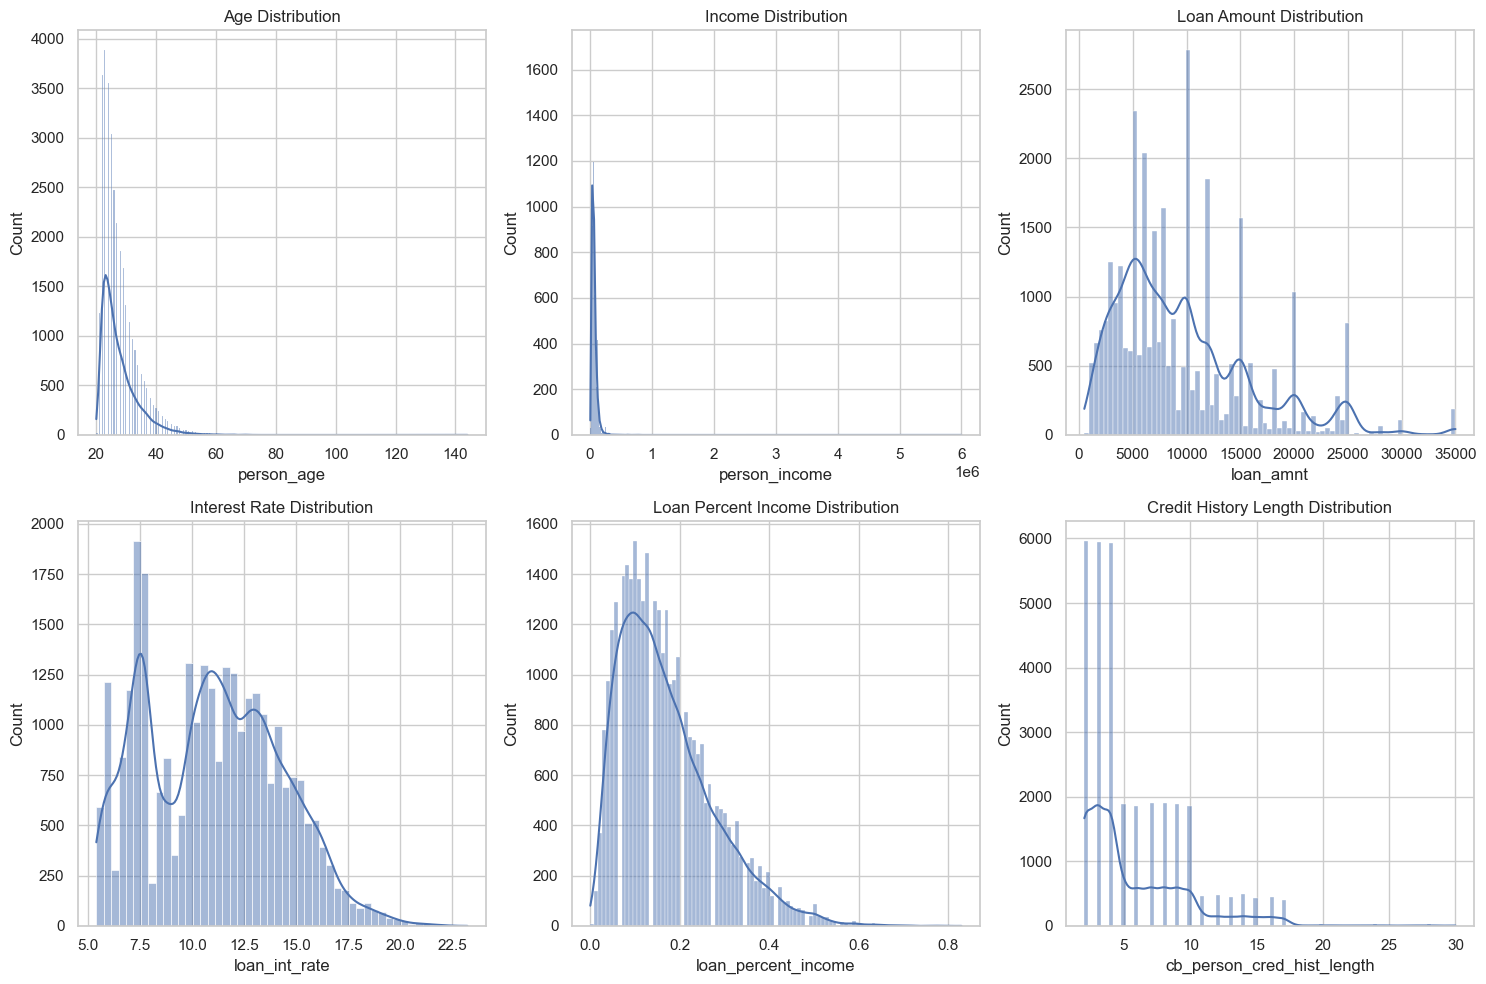

In [2]:
sns.set(style="whitegrid")

# Plot distributions of numerical features
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

sns.histplot(df['person_age'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

sns.histplot(df['person_income'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Income Distribution')

sns.histplot(df['loan_amnt'], kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Loan Amount Distribution')

sns.histplot(df['loan_int_rate'].dropna(), kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Interest Rate Distribution')

sns.histplot(df['loan_percent_income'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Loan Percent Income Distribution')

sns.histplot(df['cb_person_cred_hist_length'], kde=True, ax=axes[1, 2])
axes[1, 2].set_title('Credit History Length Distribution')

plt.tight_layout()
plt.show()

### Understanding Skewness in Numerical Features

The numerical features exhibit left ````skewness````, where the majority of data points cluster towards lower values, with a tail extending towards higher values. This skewness can impact the model's ability to accurately describe typical cases. Typically occurring cases are more frequent in skewed datasets, whereas extreme cases are rare. Therefore, the model may prioritize accommodating rare occurrences at the expense of precision for more common scenarios.

For instance, determining a coefficient based on a thousand observations all within the range [0, 10] is likely more precise than for 990 observations in the same range and 10 observations ranging between [1,000, 1,000,000]. This imbalance can diminish the overall utility of your model.

### Benefits of Addressing Skewness

Addressing skewness can yield several advantages. It makes data analysis that relies on approximately Normal distributions more feasible and informative. It also ensures that results are reported on a sensible scale, although the relevance of this depends on the specific context. Additionally, correcting skewness helps prevent skewed predictors from disproportionately influencing predicted classifications compared to other predictors.

### Choosing a Transformation Approach

When addressing left skewness in numerical features, a log transformation is often preferred over standard scaling methods like MinMaxScaler or StandardScaler. The log transformation effectively reduces the impact of extreme values and compresses the range, making the data more symmetrical and normally distributed. This approach is particularly useful for variables such as incomes, populations, and other data that typically exhibit a log-normal distribution.###

### Correlation Heatmap

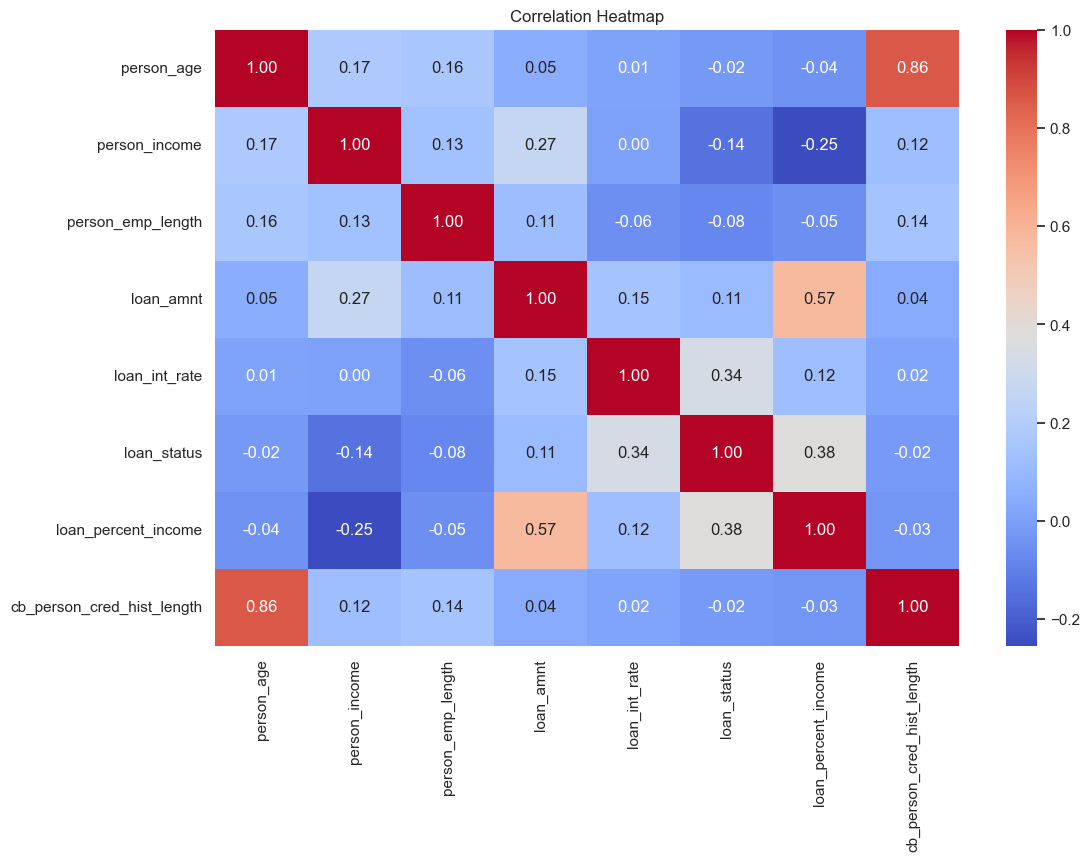

In [3]:
# Select only numerical columns
numeric_df = df.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(12, 8))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Missing Values

The ````loan_int_rate```` feature contains missing values. We are addressing this by imputing these values using a strategy based on the mean correlated with the target variable ````loan_status````, where the correlation between loan_int_rate and loan_status is 0.34.

### Pair Plot
Relationships between pairs of features.

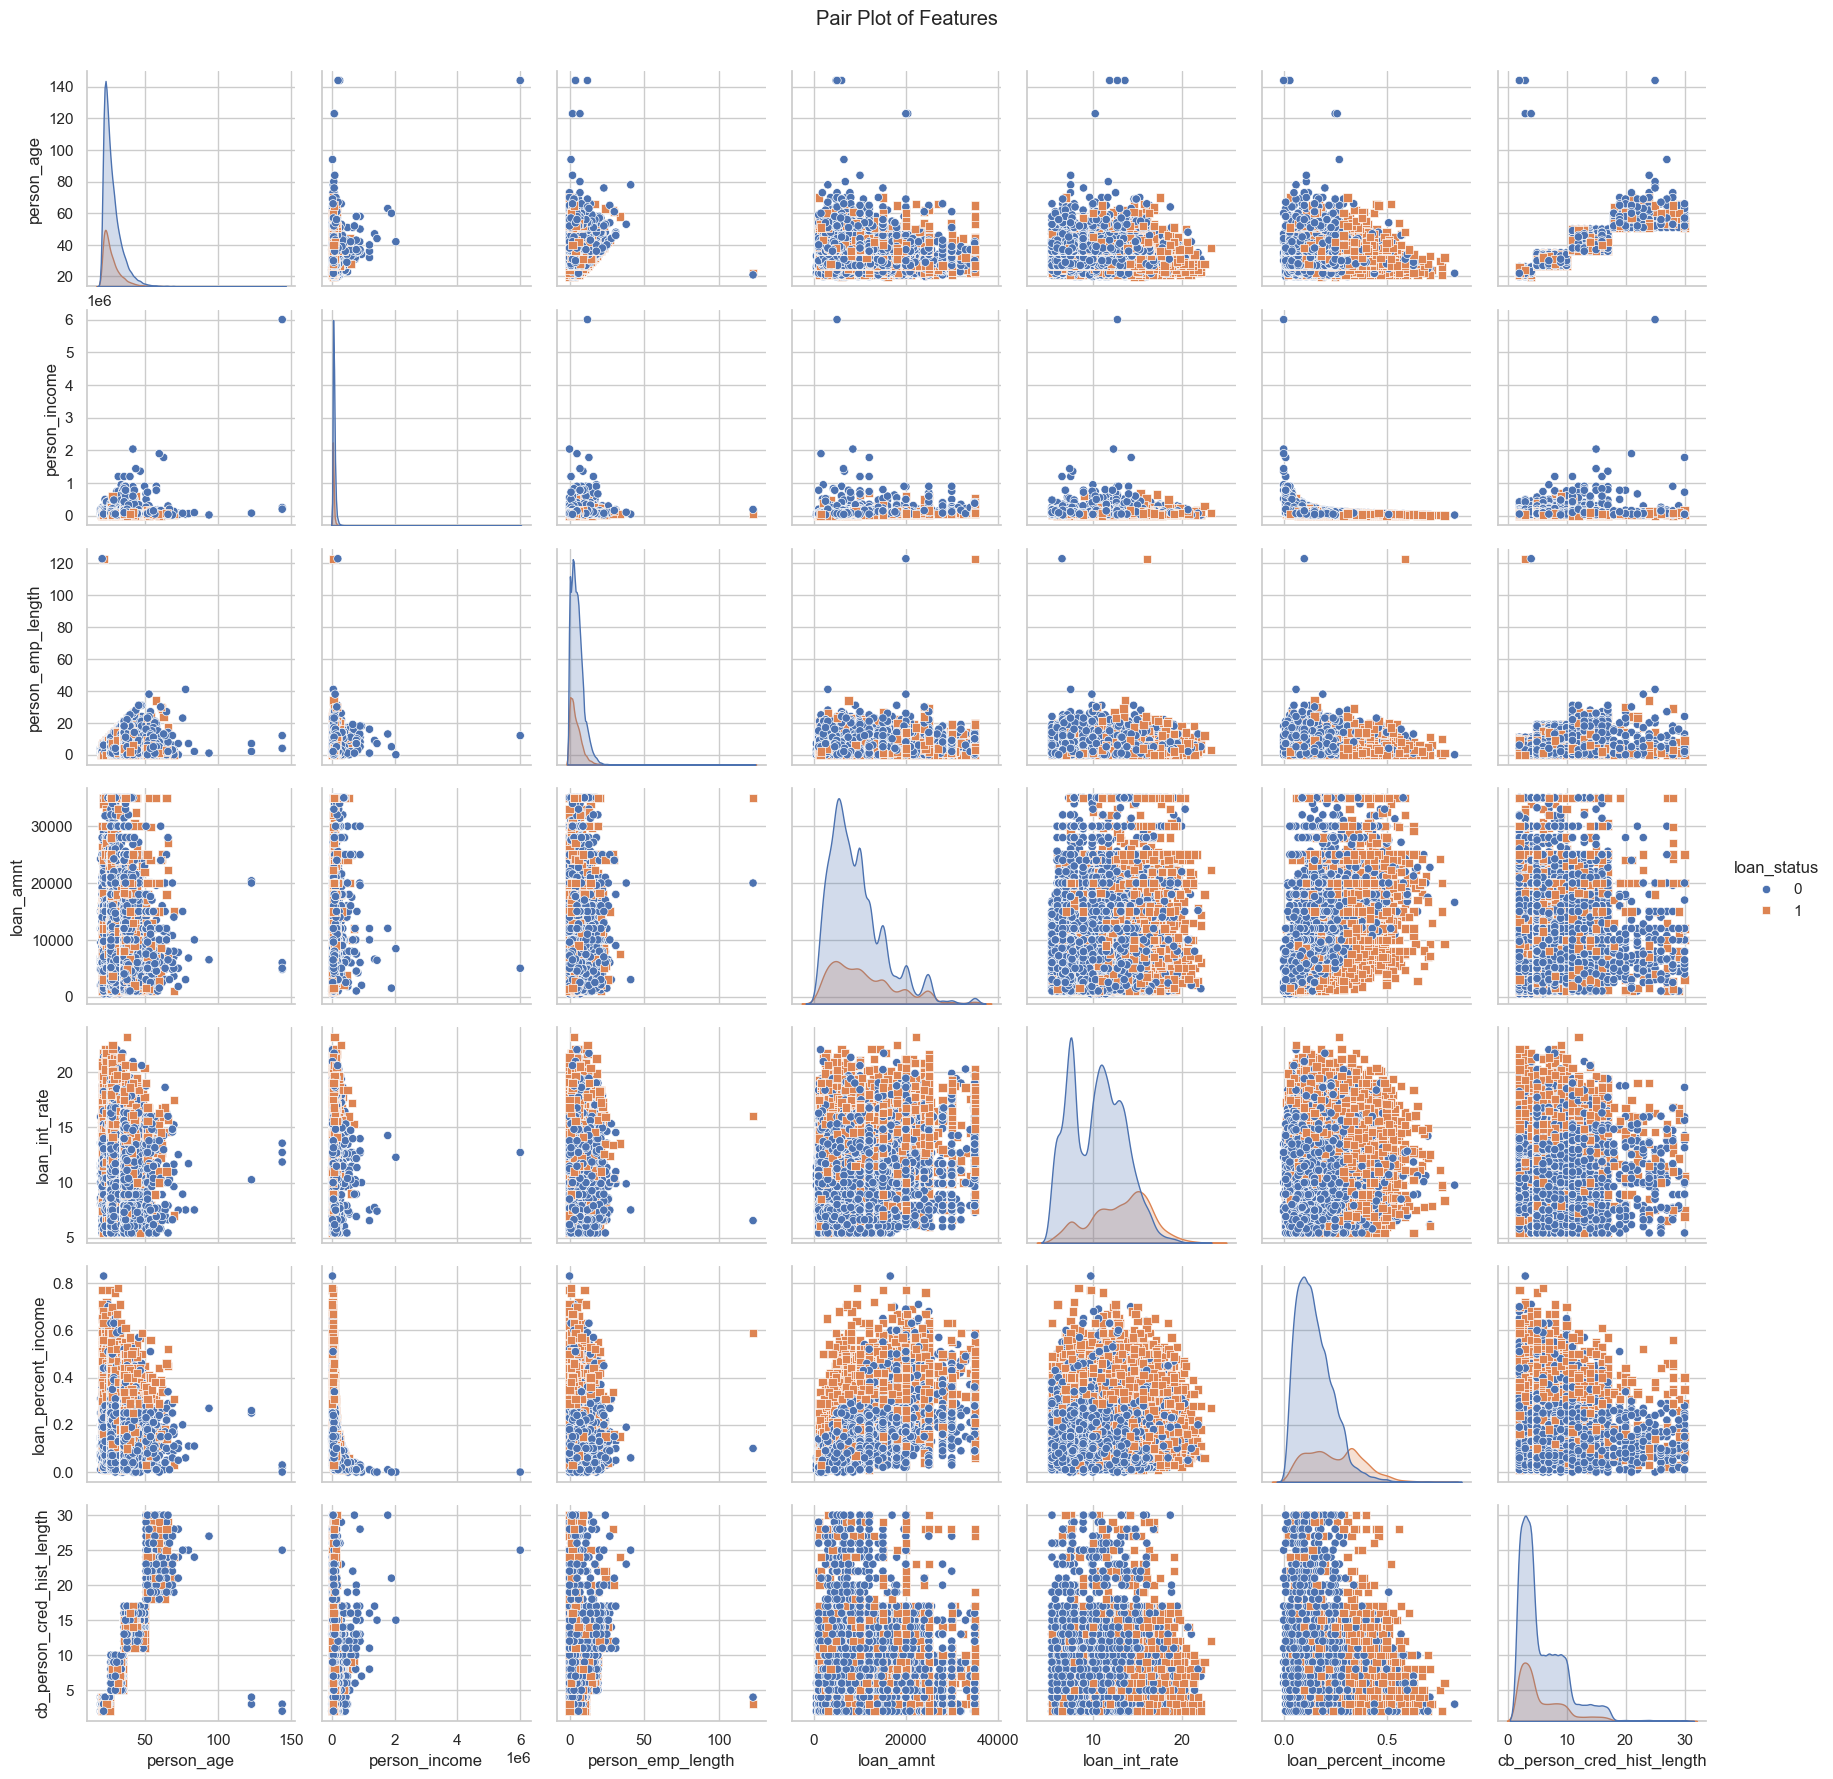

In [4]:
sns.pairplot(df, hue='loan_status', diag_kind='kde', markers=["o", "s"])
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

### Box Plots for Numerical Features by Loan Status
Distribution of numerical features with respect to loan status.

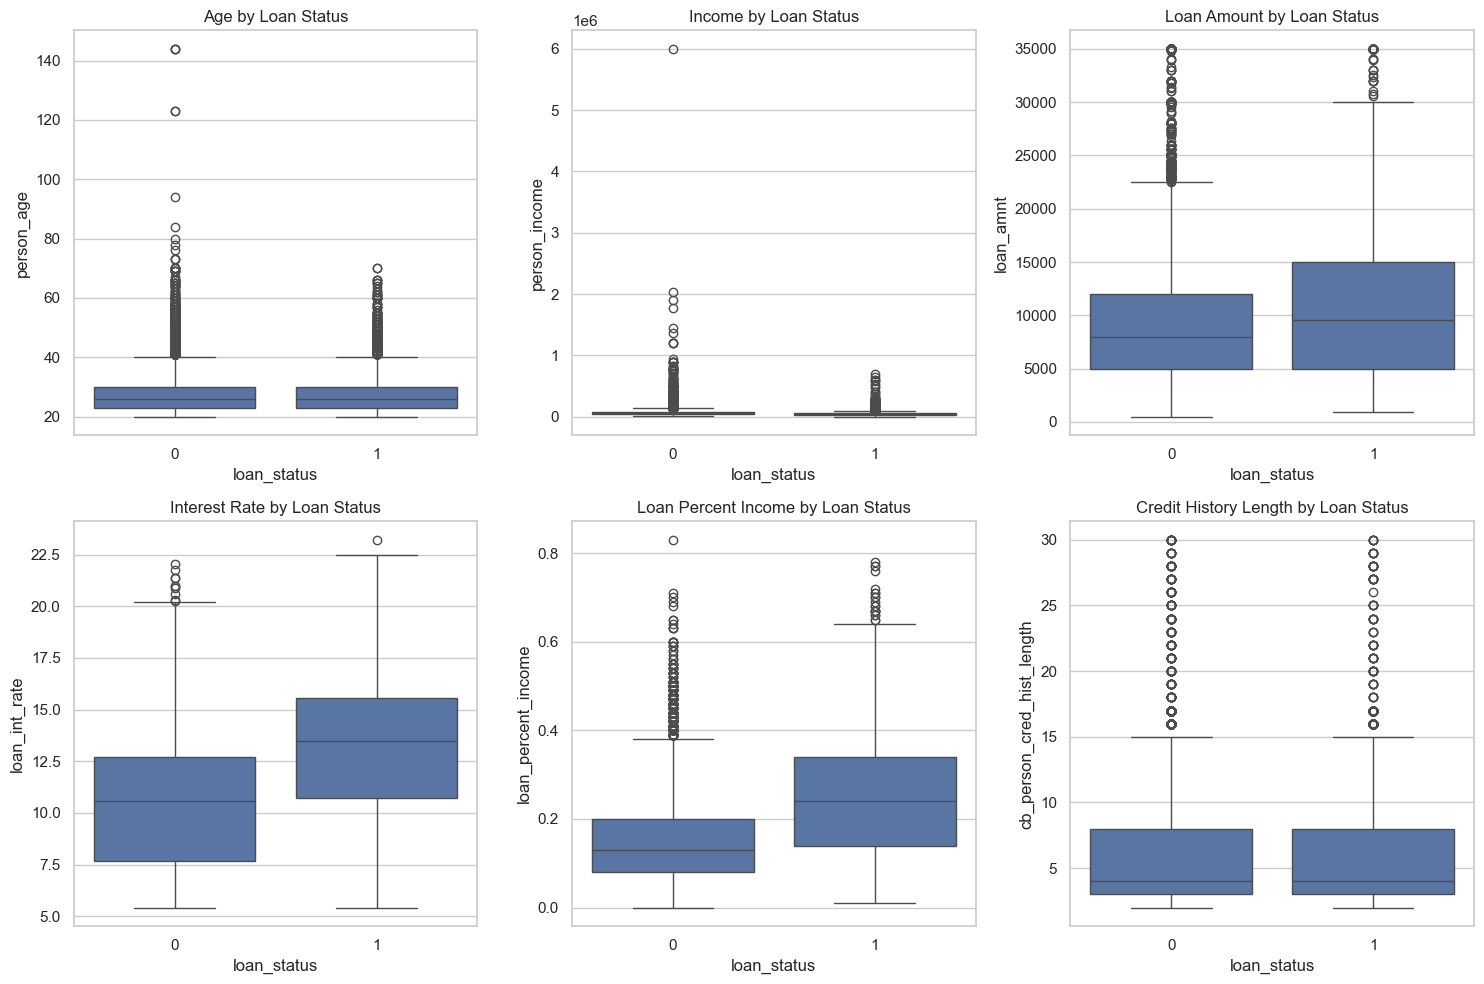

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

sns.boxplot(x='loan_status', y='person_age', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Age by Loan Status')

sns.boxplot(x='loan_status', y='person_income', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Income by Loan Status')

sns.boxplot(x='loan_status', y='loan_amnt', data=df, ax=axes[0, 2])
axes[0, 2].set_title('Loan Amount by Loan Status')

sns.boxplot(x='loan_status', y='loan_int_rate', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Interest Rate by Loan Status')

sns.boxplot(x='loan_status', y='loan_percent_income', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Loan Percent Income by Loan Status')

sns.boxplot(x='loan_status', y='cb_person_cred_hist_length', data=df, ax=axes[1, 2])
axes[1, 2].set_title('Credit History Length by Loan Status')

plt.tight_layout()
plt.show()

In [6]:
# Categorical and numerical features
categorical_features = df.select_dtypes(include=['object']).columns
numerical_features = df.select_dtypes(include=[np.number]).columns

print("\nCategorical Features:", categorical_features)
print("Numeric Features:", numerical_features)


Categorical Features: Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')
Numeric Features: Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object')


In [7]:
# Categorical feature
for col in categorical_features:
    print(f"\nDistribution of categorical feature {col}:")
    print(df[col].value_counts())


Distribution of categorical feature person_home_ownership:
person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64

Distribution of categorical feature loan_intent:
loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

Distribution of categorical feature loan_grade:
loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64

Distribution of categorical feature cb_person_default_on_file:
cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64


### Count Plots for Categorical Features

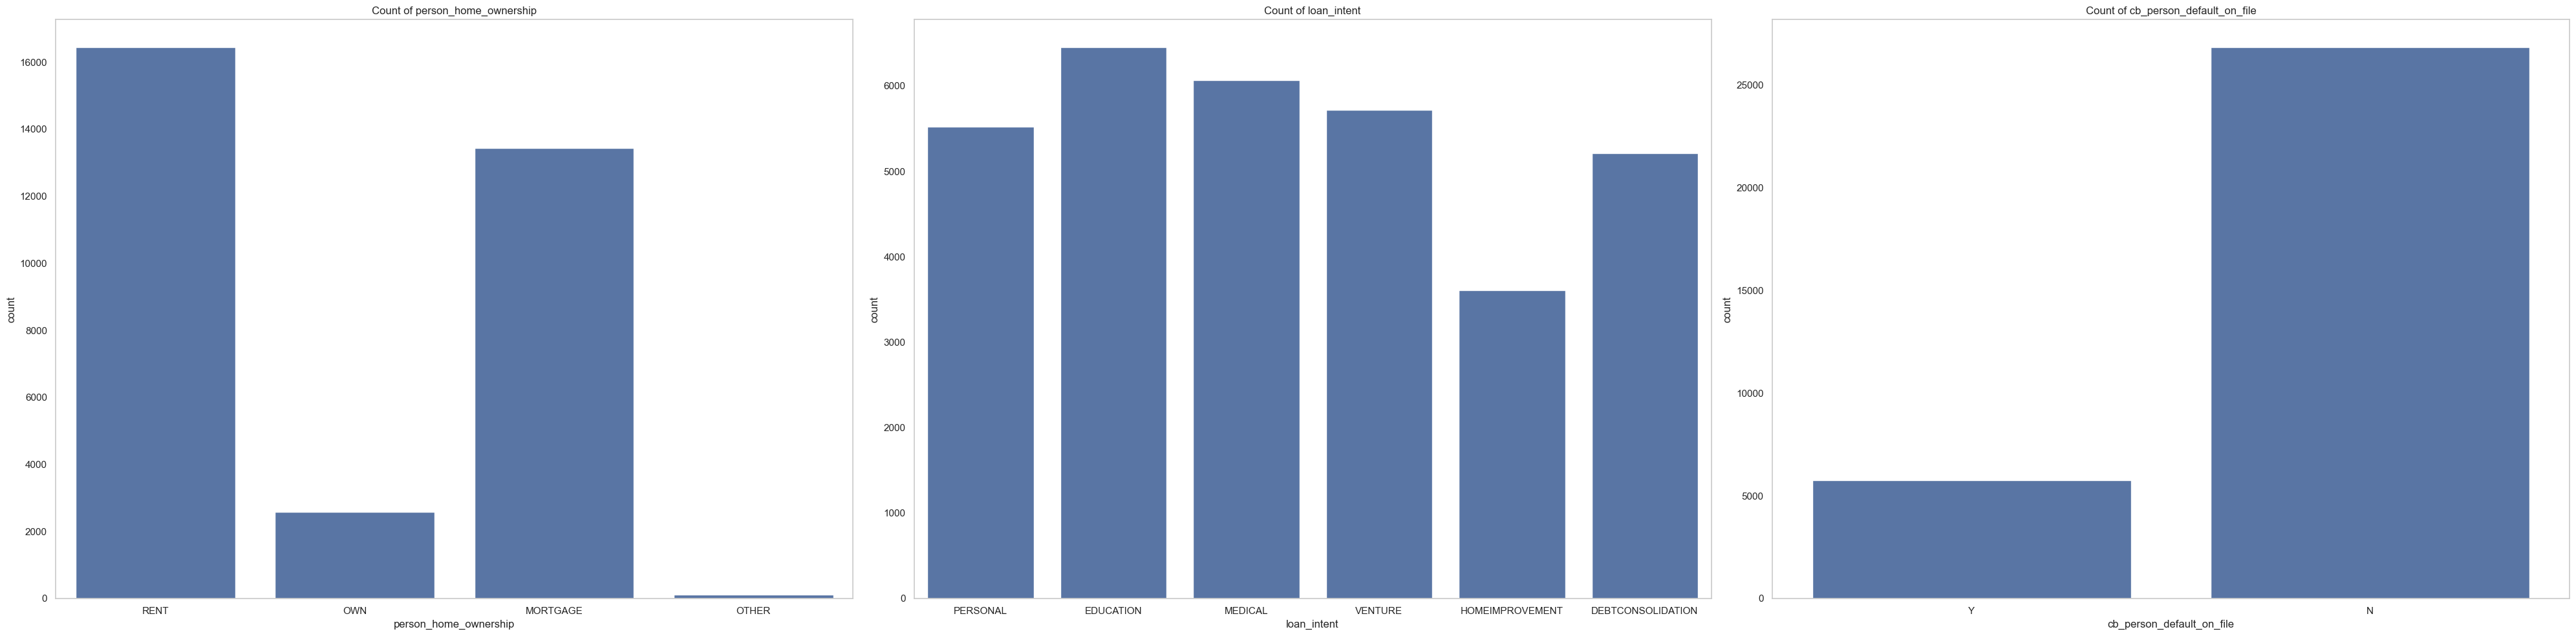

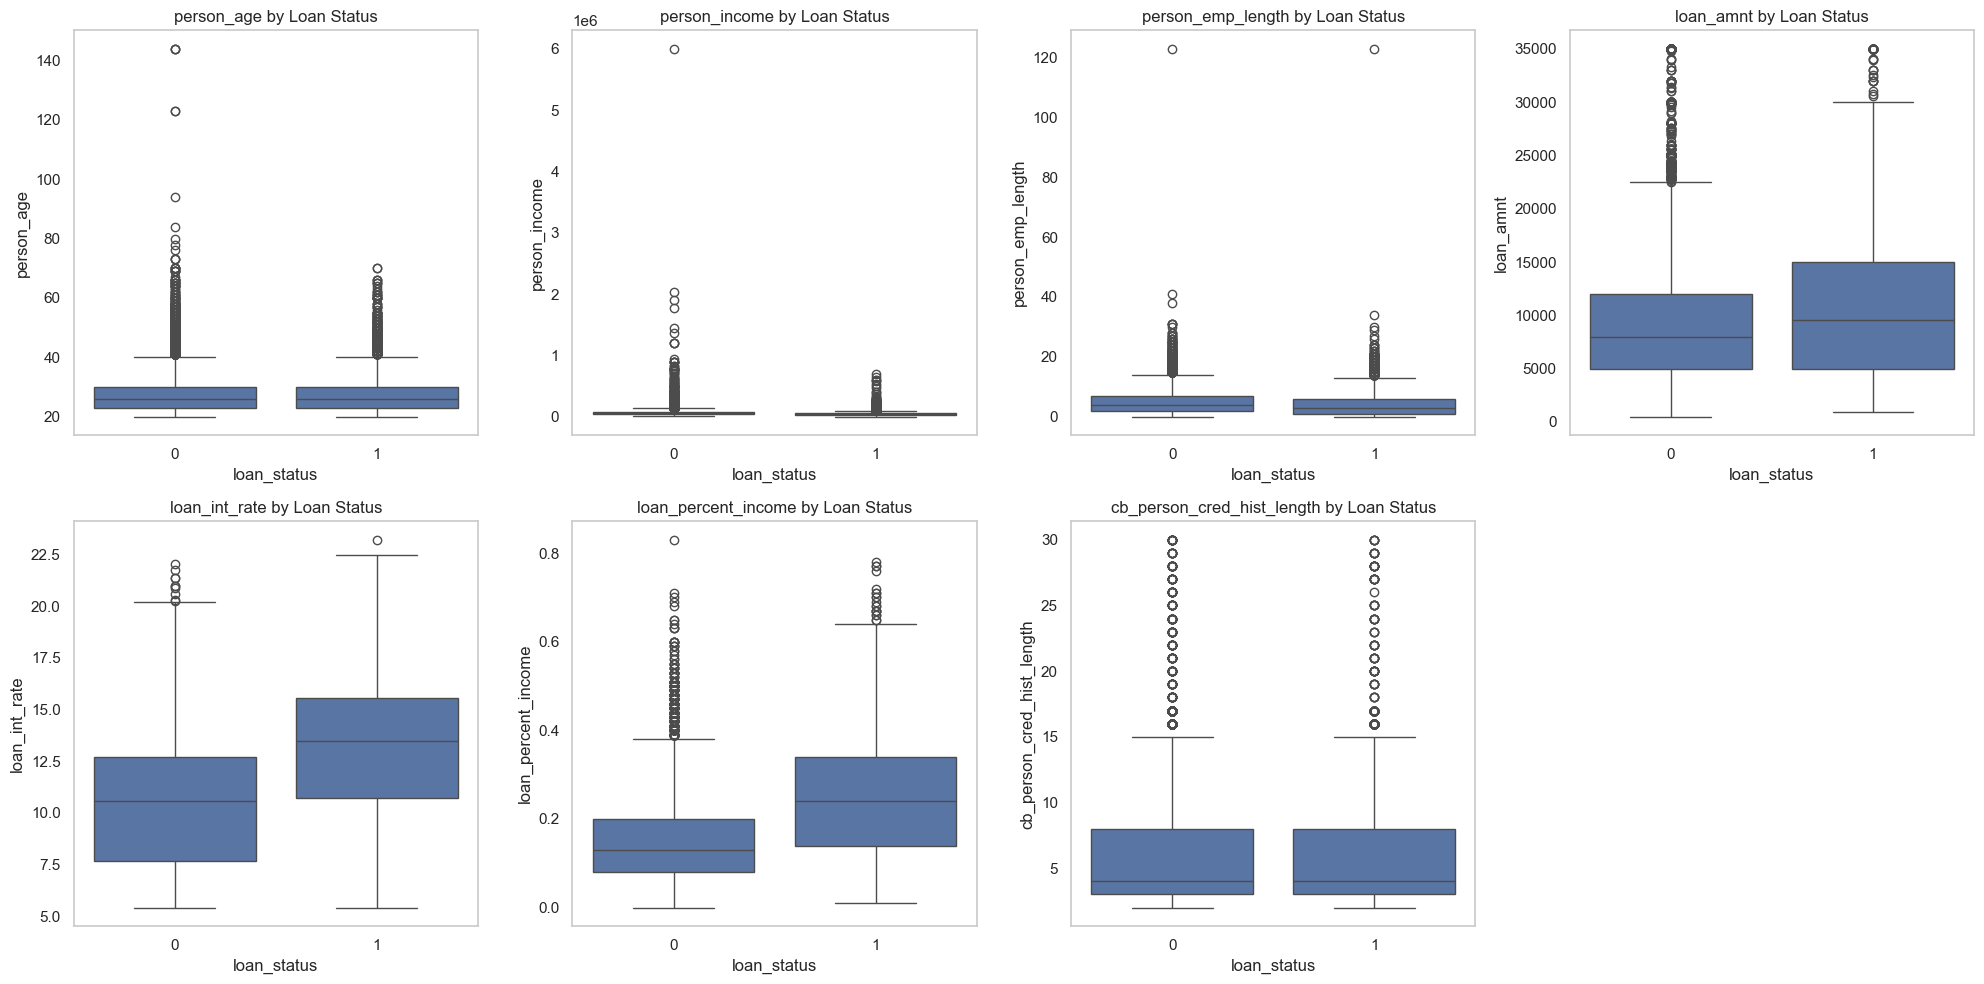

In [8]:
plt.figure(figsize=(40, 10))
categorical_cols = ['person_home_ownership', 'loan_intent', 'cb_person_default_on_file']
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=df[col])
    plt.title(f'Count of {col}')
    plt.grid(False)
    plt.tight_layout()
plt.show()

#Comparison of distributions
numerical_cols = ['person_age', 'person_income','person_emp_length', 'loan_amnt','loan_int_rate', 'loan_percent_income','cb_person_cred_hist_length']

# Boxplots chart
print()
print()
plt.figure(figsize=(20, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x='loan_status', y=col, data=df)
    plt.title(f'{col} by Loan Status')
    plt.grid(False)
plt.tight_layout()
plt.show()


Distribution of target variable 'loan_status':
loan_status
0    25473
1     7108
Name: count, dtype: int64


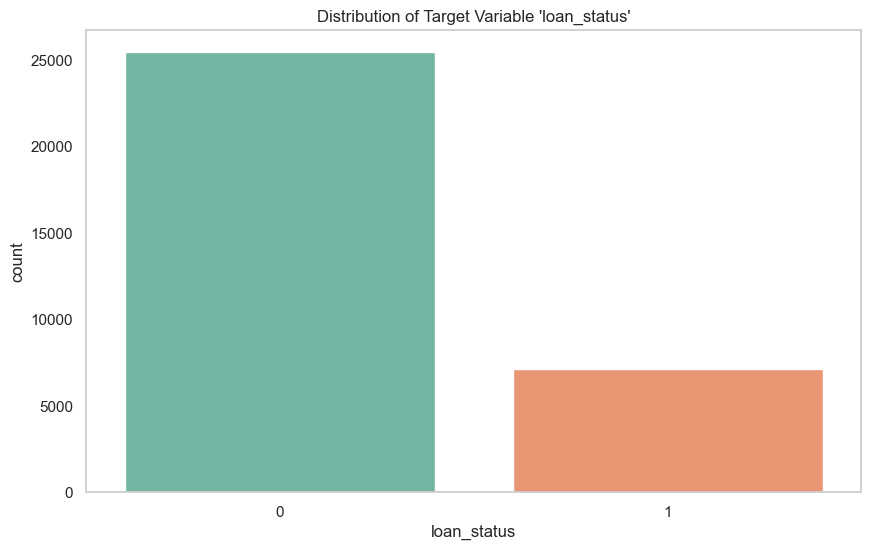

In [9]:
# Distribution of 'loan_status' Target variable
print("\nDistribution of target variable 'loan_status':")
print(df['loan_status'].value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='loan_status', palette='Set2')
plt.title("Distribution of Target Variable 'loan_status'")
plt.grid(False)
plt.show()